<hr style="margin-bottom: 50px;">
<center>
    <h1 style="margin-top: 0; margin-bottom: 0;">
        <b><u>Comparaison et anayse des performances des modèles</u></b>
    </h1>
</center>
<hr style="margin-top: 50px;">


In [139]:
import config, src

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

In [140]:
model_names = ['Logistic Regression', 'LDA', 'Decition Tree', 'Random Forest', 'Gradient Boosting']
model_filenames = ['logreg_classifier', 'LDA_classifier', 'dt_classifier', 'rf_classifier', 'hgb_classifier']
models = {name: src.load_model(filename) for name, filename in zip(model_names, model_filenames)}

Modèle 'logreg_classifier.joblib' chargé avec succès !
Modèle 'LDA_classifier.joblib' chargé avec succès !
Modèle 'dt_classifier.joblib' chargé avec succès !
Modèle 'rf_classifier.joblib' chargé avec succès !
Modèle 'hgb_classifier.joblib' chargé avec succès !


In [141]:
data = src.load_data(config.PROCESSED_DATA_COMBINED_RAP_HIPHOP_FILE)

X_train, X_test, y_train, y_test = src.split_data(data, target_column='music_genre')

Données chargées avec succès.


In [142]:
_, per_class_results = src.evaluate_model(models['LDA'], X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP, plot_roc_curve=False, plot_conf_mat=False)

----------------------------------------------------------------------------------------------------

Métriques globales :

                  Score
Accuracy       0.579572
Log Loss       1.258890
Precision      0.565239
Recall         0.564345
F1 Score       0.561889
ROC-AUC Score  0.897663

Métriques par classe :

             Precision    Recall  F1 Score  ROC-AUC Score
Alternative   0.361171  0.340143  0.350342       0.815059
Anime         0.641855  0.604675  0.622711       0.911290
Blues         0.476865  0.503490  0.489816       0.876216
Classical     0.810127  0.827038  0.818495       0.968348
Country       0.465753  0.503238  0.483771       0.874707
Electronic    0.573481  0.542887  0.557765       0.892904
Jazz          0.505080  0.350101  0.413547       0.859386
Rap/Hip-Hop   0.762399  0.769948  0.766155       0.957577
Rock          0.490415  0.637591  0.554402       0.923481

----------------------------------------------------------------------------------------------------


In [143]:
global_results = {
    'Accuracy': {},
    'Log Loss':  {},
    'Precision': {},
    'Recall': {},
    'F1 Score': {},
    'ROC-AUC Score': {},
}

per_class_results = {
    'Precision': {},
    'Recall': {},
    'F1 Score': {},
    'ROC-AUC Score': {},
}

for model_name, model in models.items():
    model_global_results, model_per_class_results = src.evaluate_model(models[model_name], X_test, y_test, classes=config.CLASSES_COMBINED_RAP_HIPHOP, print_results=False)

    for metric_results, metric_value in zip(global_results.keys(), model_global_results.values):
        global_results[metric_results][model_name] = metric_value[0]

    for metric_name, metric_values in model_per_class_results.items():
        per_class_results[metric_name][model_name] = metric_values

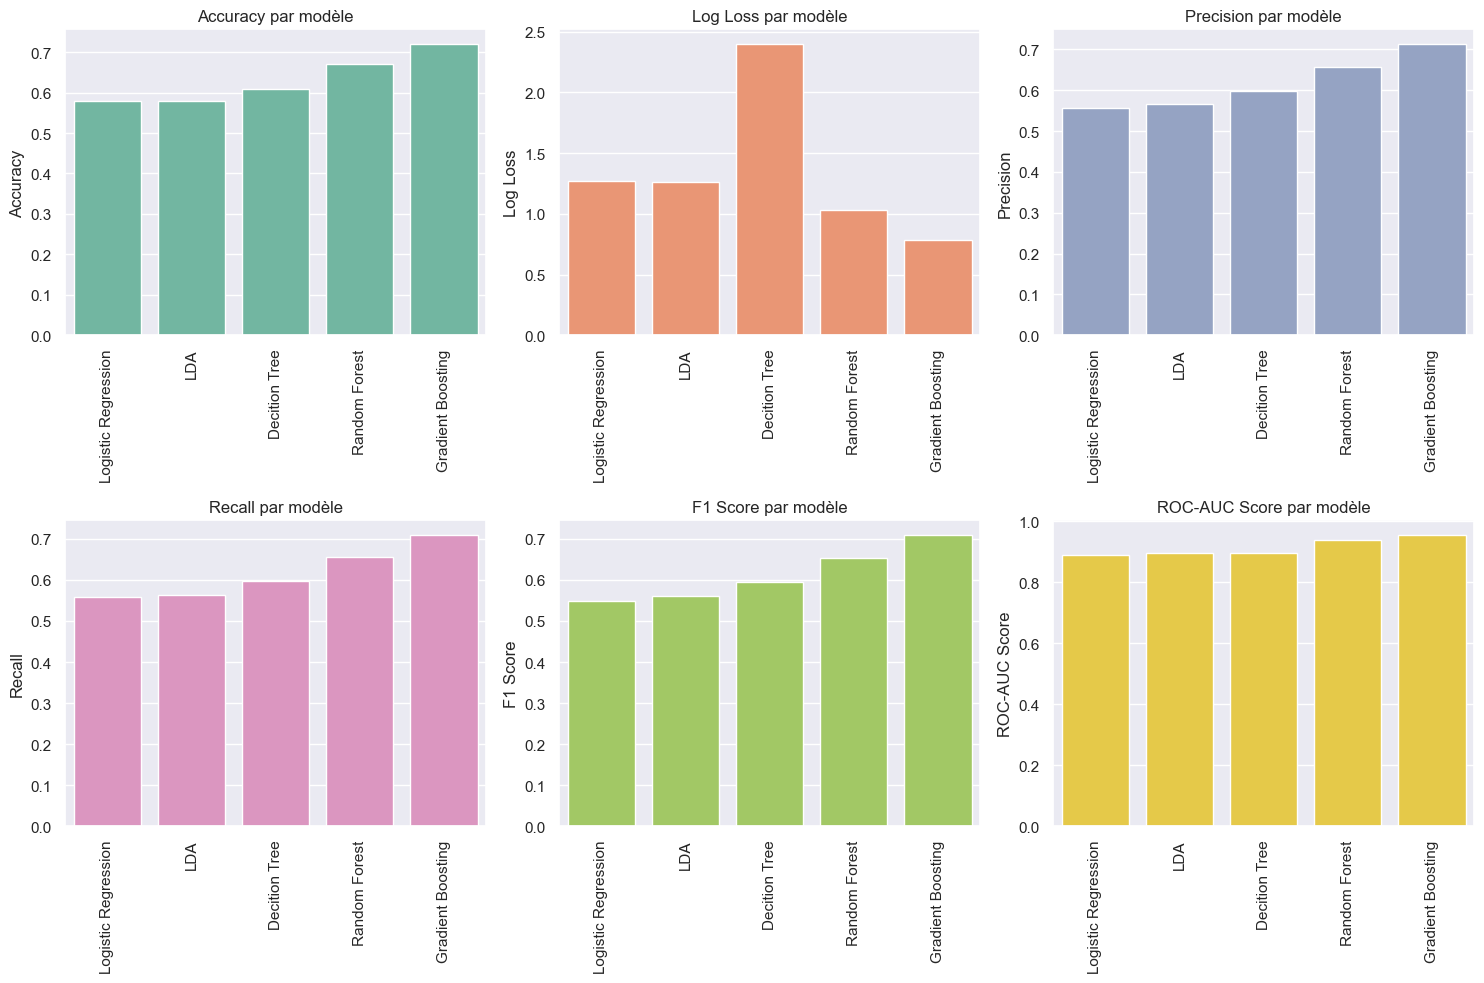

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

colors = plt.cm.Set2.colors[:6]

for i, metric in enumerate(global_results.keys()):
    sns.barplot(data=global_results[metric], ax=axes[i], color=colors[i])
    axes[i].set_title(metric + ' par modèle')
    axes[i].set_ylabel(metric)

    plt.setp(axes[i].get_xticklabels(), rotation=90)

# fig.suptitle('Comparaison des métriques entre chaque modèle', fontsize=20)
plt.tight_layout()
plt.show()

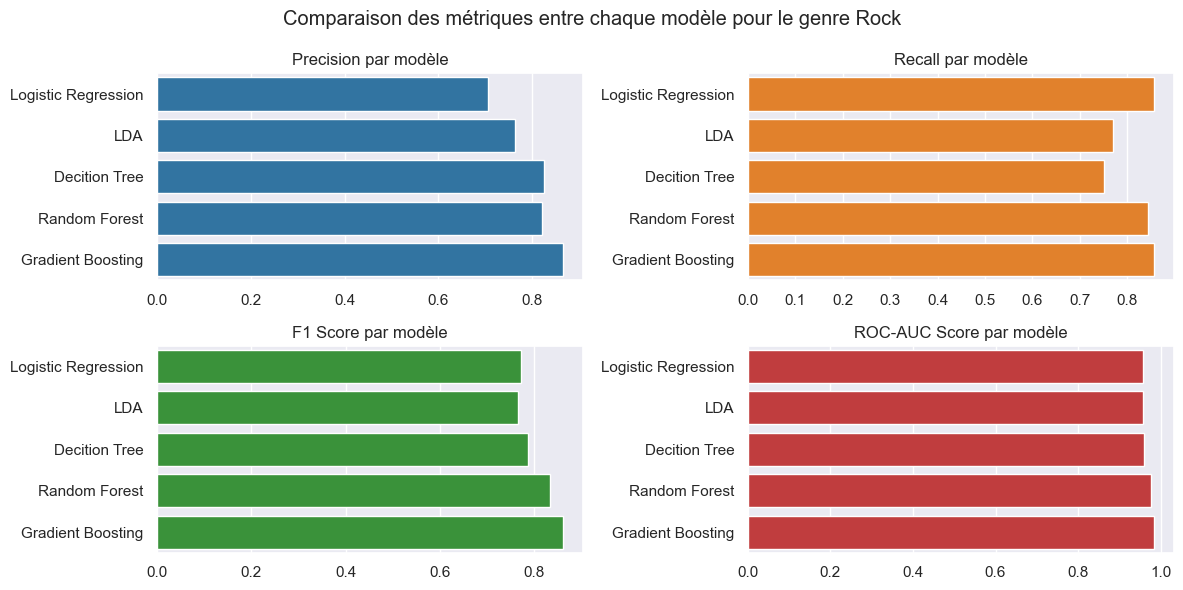

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

colors = plt.cm.tab10.colors[:4]

for i, metric in enumerate(per_class_results.keys()):
    metric_per_model_per_class = {}
    for model in model_names:
        metric_per_model_per_class[model] = per_class_results[metric][model]['Rap/Hip-Hop']
    
    sns.barplot(metric_per_model_per_class, ax=axes[i], color= colors[i], orient='h')
    axes[i].set_title(metric + ' par modèle')

plt.suptitle('Comparaison des métriques entre chaque modèle pour le genre Rock')
plt.tight_layout()
plt.show()

In [153]:
models['Gradient Boosting'].feature_importances_

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

---